In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad

# 6.2 정규확률분포

In [29]:
def norm(mean, std):
    def f(x):
        return(1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std**2))    #  std : 시그마 , sqrt : 루트 , pi : 3.14159
    return f 

In [30]:
def P(mean, std, X):
    Z = (X - mean) / std
    return Z, quad(norm(mean, std), -np.inf, X)[0] #-inf : 음의 무한대 


In [31]:
mean = 1000
std = 100

In [32]:
P(mean, std, 1100)

(1.0, 0.8413447460685428)

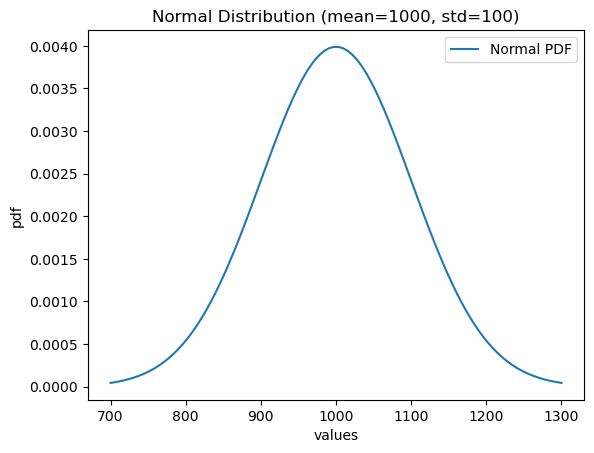

In [35]:
x = np.linspace(mean -3*std, mean + 3*std, 100)

pdf_values = stats.norm.pdf(x, mean, std)

plt.plot(x, pdf_values, label = 'Normal PDF')
plt.title('Normal Distribution (mean=1000, std=100)')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()

In [38]:
a = 1000
b = 1100

In [39]:
stats.norm.cdf(b, mean, std) - stats.norm.cdf(a, mean, std)

np.float64(0.3413447460685429)

In [40]:
round(stats.norm.cdf(b, mean, std) - stats.norm.cdf(a, mean, std), 4).item()

0.3413

In [42]:
round(1 - stats.norm.cdf(b, mean, std), 4).item()

0.1587

In [44]:
# sf = survival function
stats.norm.sf(b, mean, std).round(4).item()

0.1587

## 표준정규분포

In [49]:
def P_s(Z):
    return quad(norm(0, 1), -np.inf, Z)[0]

In [50]:
def Z(x):
    return round((x - mean) / std, 2)

In [51]:
Z(1100)

1.0

In [53]:
P_s(1.0)

0.8413447460685435

In [54]:
round(P_s(1.0),4)

0.8413

In [56]:
# 348쪽 그림 6.11
# Z=1.58 까지의 누적확률

round(P_s(1.58), 4)

0.9429

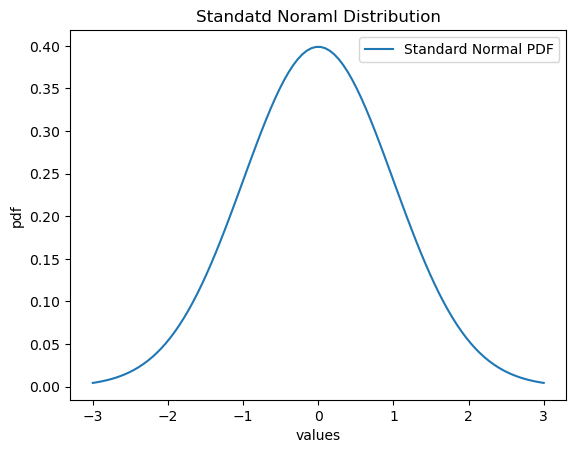

In [58]:
x = np.linspace(-3, 3, 100)

pdf_values = stats.norm.pdf(x) #pdf = probability density function 확률밀도함수

plt.plot(x, pdf_values, label='Standard Normal PDF')
plt.title('Standatd Noraml Distribution')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()

In [59]:
# 347쪽 그림 6.9
a = -0.50
b = 1.25

stats.norm.cdf(b) - stats.norm.cdf(a)

np.float64(0.5858126876071578)

In [60]:
stats.norm.cdf(b),stats.norm.cdf(a)

(np.float64(0.8943502263331446), np.float64(0.3085375387259869))

In [63]:
round(stats.norm.cdf(b) - stats.norm.cdf(a), 4).item()

0.5858

In [ ]:
# 347쪽 그림 6.10
# P(Z>=1.58) = 1 - P(Z<1.58) = 1 - P(Z<=1.58)
# P(Z=1.58) = 0 (c: 모든 실수)

a = 1.58

(1 - stats.norm.cdf(a)).round(4).item()

0.0571

In [67]:
# 우측 면적에 해당하는 경계선의 Z값 찾기 - 살아남아 있는 면적의 역함수 = Inverse Survival Function : ISF
# 348쪽 그림 6.12

#stats.norm.cdf(a) : a까지의 누적확률
#stats.norm.sf(a) : a 이후의 (살아)남아있는 면적 (확률)
#stats.norm.isf(P) : 오른쪽 남아있는 면적이 P가 되는 경계선의 z값을 찾는 것

stats.norm.isf(0.1).round(2).item()

1.28

In [69]:
# 350쪽 그리어타이어 사례

mean = 36500
std = 5000

# 주행거리가 4만 마일을 초과할 확률 (그림 6.13)

Z = (40000 - mean) / std
Z

0.7

In [70]:
# P(X > 40000) = P (Z > 0.7) = 1 - P(Z <= 0.7)

1 - stats.norm.cdf(Z) 

np.float64(0.24196365222307303)

In [71]:
(1 - stats.norm.cdf(Z)).round(4).item()

0.242

In [73]:
stats.norm.sf(Z).round(4).item()

0.242

In [76]:
# 352쪽 그림 6.14
# 10%를 보증 대상으로 하기 위한 보증 주행 거리는 얼마일까?

stats.norm.ppf(0.1).round(2).item()

-1.28

In [ ]:
# Z = (X - mean) / std 
# Z * std = X - mean
# X = Z * std + mean

def find_X(Z, mean , std):
    X = Z * std + mean
    return X

In [80]:
find_X(-1.28, mean, std)

30100.0